In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.signal import argrelextrema
from mpl_toolkits.mplot3d import Axes3D
from STUFF.poisson_disc import Grid
import random 
# theses are the packages needed

In [3]:
#step 1
length=20
width=20
# this is the l/w of the sqaure (2D) in Å

min_dis=1.2
#minimum distance of 1.2 Å for the particals 

part_dist= Grid(1.2,length,width) 
# essentially making a grid 20 by 20 

rand_coor= (random.uniform(0, length), random.uniform(0, width))
          # this genartes a random coordinate by using random.uniform to pick a x/y value between 0-20Å 
          
data=np.array(part_dist.poisson(rand_coor))
          # array containing poisson distributed coordinates 
x=np.array(data[:,0])
y=np.array(data[:,1])       
# this allows the particals to plotted using x and y 



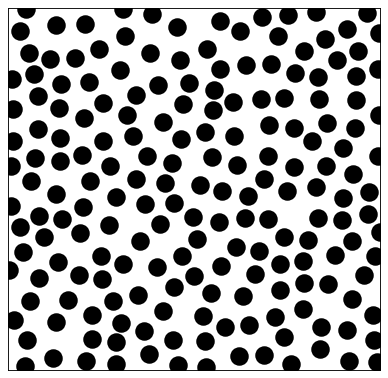

In [4]:
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k') 
#using matplotlib to make the square (the 6 here isnt Å its just units for relative size of jupyter)
plt.xlim(0,length)
plt.ylim(0,length)
#this is so the square is actually 20Å in length 
plt.scatter(x,y,s=200, facecolors='black',linewidth=2.5)
#as if we are plotting a scatter graph but instead of points it particals)
plt.tick_params(axis='both', which='both', length=0, labelleft=False, labelbottom=False)
# this is to get rid of the axis as we have plotted a graph as a way to show a image so no need for axis


In [5]:

#making the g(r) radial distribution function 
def rad_func(r,L,dr,dim):
    from numpy import zeros, sqrt, where, pi, mean, arange, histogram, absolute
    #this is so we odnt have to use numpy.etc everytime 
    
    NO_parti  = len(r) # Number of particles that you will put as r so i will asign "data" to an array and make it equal to r 
    rMax           = L/2.0; #any r that is more than half the length of the box goes against periodic boundary conditions
    edges          = arange(0., rMax + dr, dr) # The histogram bins from 0 to one res over max by res intervals 
    num_increments = len(edges) - 1 # Number of histogram bars 
    g              = zeros(num_increments) # empty numpy array that i will put g(r) in 
    radii          = zeros(num_increments) # same thing as g but for r
    Density  = len(r) / L**dim # denisty for normalistation 
    
    for index in range(NO_parti): # a loop is created so this can be done to every partical in the data array 
        d=0 #intialise value just in case as we are doing a loop 
        for i in range(dim): # a second loop for dimentions in this case 2D
            dp = absolute(r[index,i] - r[:,i]) # this is how the distance is found if the system is a fluid and the interaction is spherically symmetrical (modulas or diff in r and squared)
            fix = dp>L/2.0
            dp[fix] = L - dp[fix] #this is too fix the graph as we should not have anything above half the box length 
            d += dp*dp # this is the squaring part from the method used to find the interatomic distance 
            
        d = sqrt(d) # as the distance at the moment had been squared 
        d[index] = 2 * rMax #this is to fix the boundry conditions again 
     
        (result, bins) = histogram(d, bins=edges, density=False) # rules for our histrogram, distance at the bottom our bins are the edges defined and we dont want a graph based on density.
        g += result
    
    g = g/(NO_parti * Density) #this is to nromalise the g(r) if we dont it will keep increasing 
    
  
    for i in range(num_increments):
            radii[i] = (edges[i] + edges[i+1]) / 2
            rOuter = edges[i + 1]
            rInner = edges[i]
            g[i] = g[i] / (2.0 * pi * (rOuter-rInner)* radii[i]) #normalise also by deviding by the volume between r and dr in this case its area because its 2d
   
    return(radii,g)
    
res_dr = 0.1# resolion 
n_data=np.array(data) # creating array of atomic postions 
    
    

In [6]:
rdis, g_r = rad_func (n_data, length, res_dr, 2)

In [7]:
res= 200
safe=1e-1
interp=interp1d(rdis,g_r,kind='cubic') #interpolation with 200 points for a smooth line 

xnew = np.linspace(safe, (length/2.0)-safe, num=res, endpoint=True)

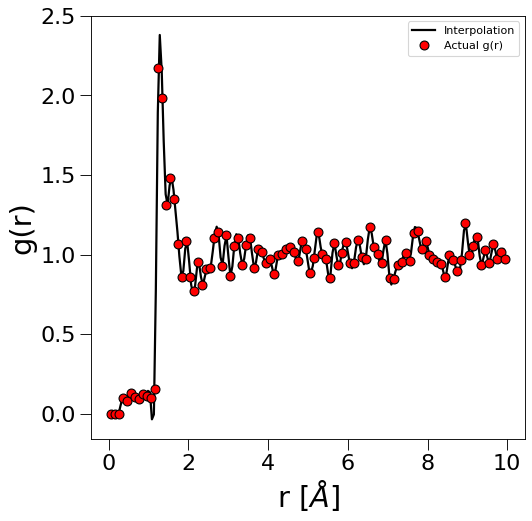

In [8]:
plt.figure(figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both', which='both', length=10, labelleft=True, labelbottom=True, labelsize=20.0)


plt.plot(xnew, interp(xnew), color='black', linestyle='solid', linewidth=2.0, label='Interpolation') 
#this is the interpolation 

#this is for the plot of the points 
plt.plot(rdis, g_r, 'o', markerfacecolor='red', markersize=8, markeredgecolor='black', 
         linewidth=2.5, label='Actual g(r)')

plt.legend()
plt.xlabel('r [$\AA$]', fontsize=26)
plt.ylabel('g(r)', fontsize=26)
plt.show()

# the g(r) peaks about 1Å  and levels off at 1 on x axis 




In [9]:
#step2
def rad_func(r,L,dr,dim):
    from numpy import zeros, sqrt, where, pi, mean, arange, histogram, absolute
    #this is so we odnt have to use numpy.etc everytime 
    
    NO_parti  = len(r) # Number of particles that you will put as r so i will asign "data" to an array and make it equal to r 
    rMax           = L/2.0; #any r that is more than half the length of the box goes against periodic boundary conditions
    edges          = arange(0., rMax + dr, dr) # The histogram bins from 0 to one res over max by res intervals 
    num_increments = len(edges) - 1 # Number of histogram bars 
    g              = zeros(num_increments) # empty numpy array that i will put g(r) in 
    radii          = zeros(num_increments) # same thing as g but for r
    Density  = len(r) / L**dim # denisty for normalistation 
    
    for index in range(NO_parti): # a loop is created so this can be done to every partical in the data array 
        d=0 #intialise value just in case as we are doing a loop 
        for i in range(dim): # a second loop for dimentions in this case 2D
            dp = absolute(r[index,i] - r[:,i]) # this is how the distance is found if the system is a fluid and the interaction is spherically symmetrical (modulas or diff in r and squared)
            fix = dp>L/2.0
            dp[fix] = L - dp[fix] #this is too fix the graph as we should not have anything above half the box length 
            d += dp*dp # this is the squaring part from the method used to find the interatomic distance 
            
        d = sqrt(d) # as the distance at the moment had been squared 
        d[index] = 2 * rMax #this is to fix the boundry conditions again 
     
        (result, bins) = histogram(d, bins=edges, density=False) # rules for our histrogram, distance at the bottom our bins are the edges defined and we dont want a graph based on density.
        g += result
    
    
    g = g/(NO_parti)
  
    for i in range(num_increments):
            radii[i] = (edges[i] + edges[i+1]) / 2
            rOuter = edges[i + 1]
            rInner = edges[i]
            
   
    return(radii,g)
    
res_dr = 0.1# resolion 
n_data=np.array(data) # creating array of atomic postions 
    
    

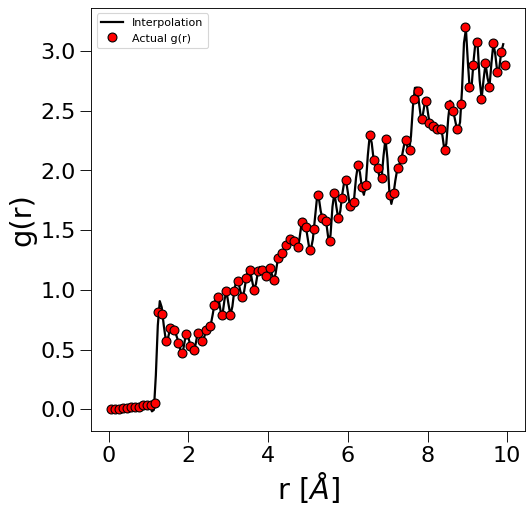

In [10]:
res_dr = 0.1# resolion 
n_data=np.array(data) # creating array of atomic postions 

rdis, g_r = rad_func (n_data, length, res_dr, 2)
res= 200
safe=1e-1
interp=interp1d(rdis,g_r,kind='cubic') #interpolation with 200 points for a smooth line 

xnew = np.linspace(safe, (length/2.0)-safe, num=res, endpoint=True)
    
plt.figure(figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both', which='both', length=10, labelleft=True, labelbottom=True, labelsize=20.0)


plt.plot(xnew, interp(xnew), color='black', linestyle='solid', linewidth=2.0, label='Interpolation') 
#this is the interpolation 

#this is for the plot of the points 
plt.plot(rdis, g_r, 'o', markerfacecolor='red', markersize=8, markeredgecolor='black', 
         linewidth=2.5, label='Actual g(r)')

plt.legend()
plt.xlabel('r [$\AA$]', fontsize=26)
plt.ylabel('g(r)', fontsize=26)
plt.show()
# this gr keeps increasing and does not level off at two unlike the normalised one. it still has a small bump  at around 1A before it increases however

In [11]:
#step 3
def rad_func(r,L,dr,dim):
    from numpy import zeros, sqrt, where, pi, mean, arange, histogram, absolute
    #this is so we odnt have to use numpy.etc everytime 
    
    NO_parti  = len(r) # Number of particles that you will put as r so i will asign "data" to an array and make it equal to r 
    rMax           = L/2.0; #any r that is more than half the length of the box goes against periodic boundary conditions
    edges          = arange(0., rMax + dr, dr) # The histogram bins from 0 to one res over max by res intervals 
    num_increments = len(edges) - 1 # Number of histogram bars 
    g              = zeros(num_increments) # empty numpy array that i will put g(r) in 
    radii          = zeros(num_increments) # same thing as g but for r
    Density  = len(r) / L**dim # denisty for normalistation 
    
    for index in range(NO_parti): # a loop is created so this can be done to every partical in the data array 
        d=0 #intialise value just in case as we are doing a loop 
        for i in range(dim): # a second loop for dimentions in this case 2D
            dp = absolute(r[index,i] - r[:,i]) # this is how the distance is found if the system is a fluid and the interaction is spherically symmetrical (modulas or diff in r and squared)
            fix = dp>L/2.0
            dp[fix] = L - dp[fix] #this is too fix the graph as we should not have anything above half the box length 
            d += dp*dp # this is the squaring part from the method used to find the interatomic distance 
            
        d = sqrt(d) # as the distance at the moment had been squared 
        d[index] = 2 * rMax #this is to fix the boundry conditions again 
     
        (result, bins) = histogram(d, bins=edges, density=False) # rules for our histrogram, distance at the bottom our bins are the edges defined and we dont want a graph based on density.
        g += result
    
    g = g/(NO_parti * Density) #this is to nromalise the g(r) if we dont it will keep increasing 
    
  
    for i in range(num_increments):
            radii[i] = (edges[i] + edges[i+1]) / 2
            rOuter = edges[i + 1]
            rInner = edges[i]
            g[i] = g[i] / (2.0 * pi * (rOuter-rInner)* radii[i]) #normalise also by deviding by the volume between r and dr in this case its area because its 2d
   
    return(radii,g)
    
    
rdis, g_r = rad_func (n_data, length, res_dr, 2)

res= 200
safe=1e-1
interp=interp1d(rdis,g_r,kind='cubic') #interpolation with 200 points for a smooth line 

xnew = np.linspace(safe, (length/2.0)-safe, num=res, endpoint=True)

    
    ### to get right function 

    
    

In [12]:
#step 3
configs=50 #ber of configerations of particlas in that 2D box 

g_R=np.zeros((len(g_r),configs)) # 50 lines of 0 at length of g(r)

g_R_ave=np.zeros(len(g_r)) #zeros at length g(r)

min_dis = 1.2

grid = Grid(min_dis, length, width)
rand_coor = (random.uniform(0, length), random.uniform(0, width)) 
#same as step one

n_ave=0
for i in range(0,configs):
    data = grid.poisson(rand_coor)
    n_data=np.array(data)
    rdis, g_r = rad_func(n_data, length, res_dr, 2)
    g_R[:,i]=g_r
    n_ave=n_ave+len(n_data)
    
    #this loop creats a configerartion like step one and puts it into the funtion to make a g(r) like step 1, but it does it with every configeration (50 of them)


g_R_ave=(np.sum(g_R, axis=1))/configs
# adding all g(r) and dividing by how many configs there are(ensable average)
interp_ave = interp1d(rdis, g_R_ave, kind='cubic')
#interpolation of new graph


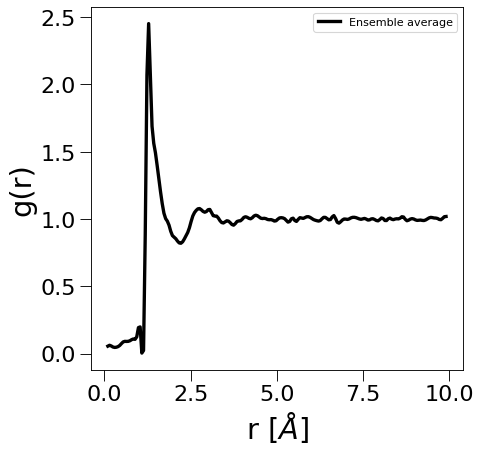

In [14]:

xnew = np.linspace(safe, (length/2.0)-safe, num=res, endpoint=True)
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k') 
plt.tick_params(axis='both', which='both', length=10, labelleft=True, labelbottom=True, labelsize=20.0)
plt.plot(xnew, interp_ave(xnew), color='black', linestyle='solid', linewidth=3.0, label='Ensemble average')
plt.xlabel('r [$\AA$]', fontsize=26)
plt.ylabel('g(r)', fontsize=26)
plt.legend()
plt.show()
#plotting 
# 50 points is enough to show that it converges to 1. 

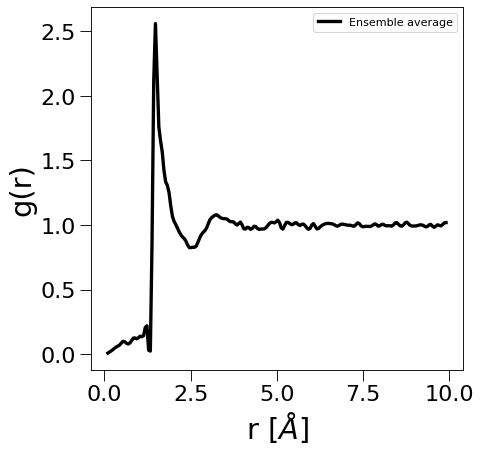

In [13]:
#step 4
#trial 1
 
configs=50 

g_R=np.zeros((len(g_r),configs)) 

g_R_ave=np.zeros(len(g_r)) 


min_dis = 1.4

grid = Grid(min_dis, length, width)
rand_coor = (random.uniform(0, length), random.uniform(0, width)) 
#same as step one

n_ave=0
for i in range(0,configs):
    data = grid.poisson(rand_coor)
    n_data=np.array(data)
    rdis, g_r = rad_func(n_data, length, res_dr, 2)
    g_R[:,i]=g_r
    n_ave=n_ave+len(n_data)
    


g_R_ave=(np.sum(g_R, axis=1))/configs
interp_ave1 = interp1d(rdis, g_R_ave, kind='cubic')


xnew = np.linspace(safe, (length/2.0)-safe, num=res, endpoint=True)
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k') 
plt.tick_params(axis='both', which='both', length=10, labelleft=True, labelbottom=True, labelsize=20.0)
plt.plot(xnew, interp_ave1(xnew), color='black', linestyle='solid', linewidth=3.0, label='Ensemble average')
plt.xlabel('r [$\AA$]', fontsize=26)
plt.ylabel('g(r)', fontsize=26)
plt.legend()
plt.show()


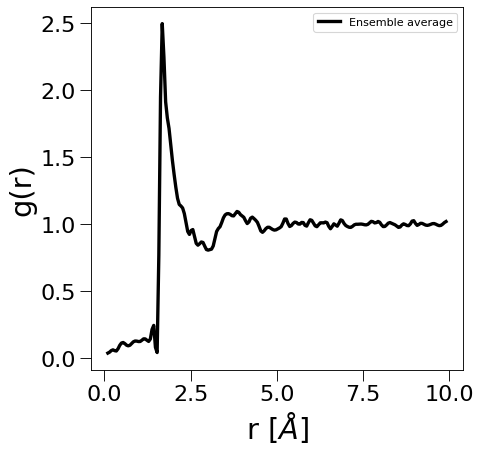

In [14]:
#trial 2
 
configs=50 

g_R=np.zeros((len(g_r),configs)) 

g_R_ave=np.zeros(len(g_r)) 

min_dis = 1.6

grid = Grid(min_dis, length, width)
rand_coor = (random.uniform(0, length), random.uniform(0, width)) 
#same as step one

n_ave=0
for i in range(0,configs):
    data = grid.poisson(rand_coor)
    n_data=np.array(data)
    rdis, g_r = rad_func(n_data, length, res_dr, 2)
    g_R[:,i]=g_r
    n_ave=n_ave+len(n_data)
    


g_R_ave=(np.sum(g_R, axis=1))/configs

interp_ave2 = interp1d(rdis, g_R_ave, kind='cubic')



xnew = np.linspace(safe, (length/2.0)-safe, num=res, endpoint=True)
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k') 
plt.tick_params(axis='both', which='both', length=10, labelleft=True, labelbottom=True, labelsize=20.0)
plt.plot(xnew, interp_ave2(xnew), color='black', linestyle='solid', linewidth=3.0, label='Ensemble average')
plt.xlabel('r [$\AA$]', fontsize=26)
plt.ylabel('g(r)', fontsize=26)
plt.legend()
plt.show()


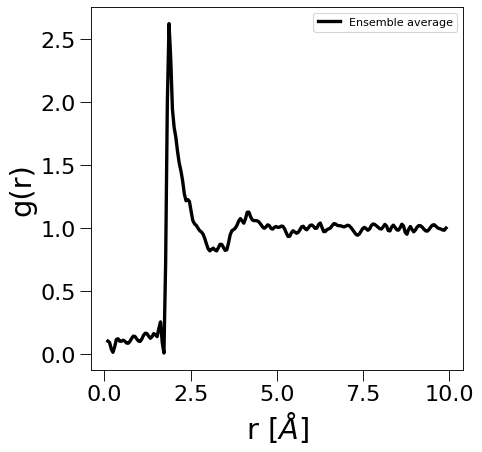

In [15]:
#trial 3
 
configs=50 

g_R=np.zeros((len(g_r),configs)) 

g_R_ave=np.zeros(len(g_r)) 

min_dis = 1.8

grid = Grid(min_dis, length, width)
rand_coor = (random.uniform(0, length), random.uniform(0, width)) 
#same as step one

n_ave=0
for i in range(0,configs):
    data = grid.poisson(rand_coor)
    n_data=np.array(data)
    rdis, g_r = rad_func(n_data, length, res_dr, 2)
    g_R[:,i]=g_r
    n_ave=n_ave+len(n_data)
    


g_R_ave=(np.sum(g_R, axis=1))/configs

interp_ave3 = interp1d(rdis, g_R_ave, kind='cubic')



xnew = np.linspace(safe, (length/2.0)-safe, num=res, endpoint=True)
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k') 
plt.tick_params(axis='both', which='both', length=10, labelleft=True, labelbottom=True, labelsize=20.0)
plt.plot(xnew, interp_ave3(xnew), color='black', linestyle='solid', linewidth=3.0, label='Ensemble average')
plt.xlabel('r [$\AA$]', fontsize=26)
plt.ylabel('g(r)', fontsize=26)
plt.legend()
plt.show()


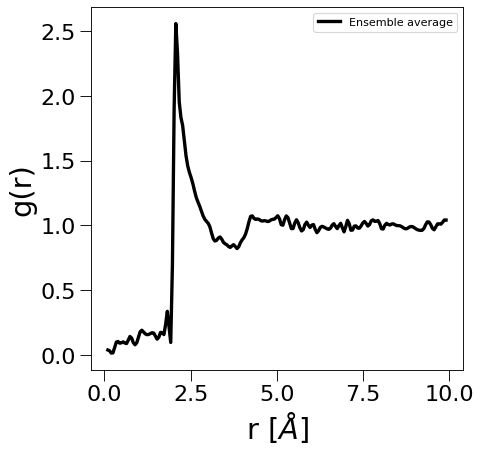

In [16]:
#trial 4
 
configs=50  

g_R=np.zeros((len(g_r),configs)) 

g_R_ave=np.zeros(len(g_r)) 

min_dis = 2

grid = Grid(min_dis, length, width)
rand_coor = (random.uniform(0, length), random.uniform(0, width)) 


n_ave=0
for i in range(0,configs):
    data = grid.poisson(rand_coor)
    n_data=np.array(data)
    rdis, g_r = rad_func(n_data, length, res_dr, 2)
    g_R[:,i]=g_r
    n_ave=n_ave+len(n_data)
    


g_R_ave=(np.sum(g_R, axis=1))/configs

interp_ave4 = interp1d(rdis, g_R_ave, kind='cubic')



xnew = np.linspace(safe, (length/2.0)-safe, num=res, endpoint=True)
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k') 
plt.tick_params(axis='both', which='both', length=10, labelleft=True, labelbottom=True, labelsize=20.0)
plt.plot(xnew, interp_ave4(xnew), color='black', linestyle='solid', linewidth=3.0, label='Ensemble average')
plt.xlabel('r [$\AA$]', fontsize=26)
plt.ylabel('g(r)', fontsize=26)
plt.legend()
plt.show()


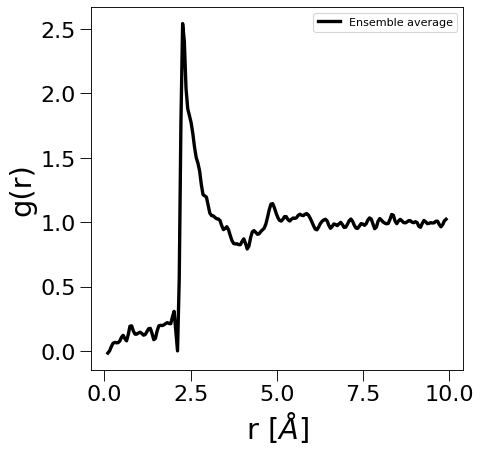

In [17]:
#trial 5
 
configs=50 

g_R=np.zeros((len(g_r),configs)) 

g_R_ave=np.zeros(len(g_r)) 

min_dis = 2.2

grid = Grid(min_dis, length, width)
rand_coor = (random.uniform(0, length), random.uniform(0, width)) 


n_ave=0
for i in range(0,configs):
    data = grid.poisson(rand_coor)
    n_data=np.array(data)
    rdis, g_r = rad_func(n_data, length, res_dr, 2)
    g_R[:,i]=g_r
    n_ave=n_ave+len(n_data)
    


g_R_ave=(np.sum(g_R, axis=1))/configs
interp_ave5 = interp1d(rdis, g_R_ave, kind='cubic')


xnew = np.linspace(safe, (length/2.0)-safe, num=res, endpoint=True)
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k') 
plt.tick_params(axis='both', which='both', length=10, labelleft=True, labelbottom=True, labelsize=20.0)
plt.plot(xnew, interp_ave5(xnew), color='black', linestyle='solid', linewidth=3.0, label='Ensemble average')
plt.xlabel('r [$\AA$]', fontsize=26)
plt.ylabel('g(r)', fontsize=26)
plt.legend()
plt.show()
# i plotted all to see if my code worked and if my graphs are translating 
 

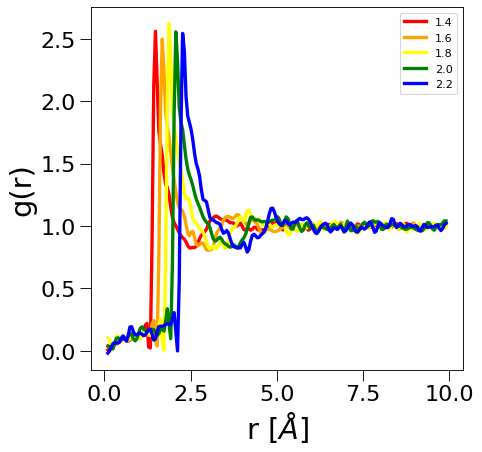

In [18]:
xnew = np.linspace(safe, (length/2.0)-safe, num=res, endpoint=True)
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k') 
plt.tick_params(axis='both', which='both', length=10, labelleft=True, labelbottom=True, labelsize=20.0)
plt.plot(xnew, interp_ave1(xnew), color='red', linestyle='solid', linewidth=3.0, label='1.4')
plt.plot(xnew, interp_ave2(xnew), color='orange', linestyle='solid', linewidth=3.0, label='1.6')
plt.plot(xnew, interp_ave3(xnew), color='yellow', linestyle='solid', linewidth=3.0, label='1.8')
plt.plot(xnew, interp_ave4(xnew), color='green', linestyle='solid', linewidth=3.0, label='2.0')
plt.plot(xnew, interp_ave5(xnew), color='blue', linestyle='solid', linewidth=3.0, label='2.2')
plt.xlabel('r [$\AA$]', fontsize=26)
plt.ylabel('g(r)', fontsize=26)
plt.legend()
plt.show()
# i wanted to do this with a nparray instead of doing it one by one but i coulnt get it to work. 

In [19]:
# step 5
#trial 1
 
configs=50 

g_R=np.zeros((len(g_r),configs)) 

g_R_ave=np.zeros(len(g_r)) 


min_dis = 1.4

grid = Grid(min_dis, length, width)
rand_coor = (random.uniform(0, length), random.uniform(0, width)) 
#same as step one

n_ave=0
for i in range(0,configs):
    data = grid.poisson(rand_coor)
    n_data=np.array(data)
    rdis, g_r = rad_func(n_data, length, res_dr, 2)
    g_R[:,i]=g_r
    n_ave=n_ave+len(n_data)
    


g_R_ave=(np.sum(g_R, axis=1))/configs
interp_ave1 = interp1d(rdis, g_R_ave, kind='cubic')


xnew = np.linspace(safe, (length/2.0)-safe, num=res, endpoint=True)


d2dr1 = rdis[1]-rdis[0] #this is dr for integration 
density = n_ave/(length*length) # density which is number not average (multiplied by integral)
r_prime = 1.0 # 1Å is the cut off radius 
cn1 = 0.0 # initialize for loop 

for i in range(0,len(rdis)):
    if rdis[i] > r_prime: # loop ends it r is bigger that r prime 
        break
    cn1 = cn1 +(g_R_ave[i]*rdis[i]*d2dr1)

cn1 = cn1 * (2*np.pi*density)
print(cn1)

4.947623602353517


In [20]:
#trial 2
 
configs=50 

g_R=np.zeros((len(g_r),configs)) 

g_R_ave=np.zeros(len(g_r)) 


min_dis = 1.6

grid = Grid(min_dis, length, width)
rand_coor = (random.uniform(0, length), random.uniform(0, width)) 
#same as step one

n_ave=0
for i in range(0,configs):
    data = grid.poisson(rand_coor)
    n_data=np.array(data)
    rdis, g_r = rad_func(n_data, length, res_dr, 2)
    g_R[:,i]=g_r
    n_ave=n_ave+len(n_data)
    


g_R_ave=(np.sum(g_R, axis=1))/configs
interp_ave2 = interp1d(rdis, g_R_ave, kind='cubic')


xnew = np.linspace(safe, (length/2.0)-safe, num=res, endpoint=True)


d2dr2 = rdis[1]-rdis[0] #this is dr for integration 
density = n_ave/(length*length) # density which is number not average (multiplied by integral)
r_prime = 1.0 # 1Å is the cut off radius 
cn2 = 0.0 # initialize for loop 

for i in range(0,len(rdis)):
    if rdis[i] > r_prime: # loop ends it r is bigger that r prime 
        break
    cn2 = cn2 +(g_R_ave[i]*rdis[i]*d2dr2)

cn2 = cn2 * (2*np.pi*density)
print(cn2)

4.323663793139896


In [21]:
#trial 3
 
configs=50 

g_R=np.zeros((len(g_r),configs)) 

g_R_ave=np.zeros(len(g_r)) 


min_dis = 1.8

grid = Grid(min_dis, length, width)
rand_coor = (random.uniform(0, length), random.uniform(0, width)) 
#same as step one

n_ave=0
for i in range(0,configs):
    data = grid.poisson(rand_coor)
    n_data=np.array(data)
    rdis, g_r = rad_func(n_data, length, res_dr, 2)
    g_R[:,i]=g_r
    n_ave=n_ave+len(n_data)
    


g_R_ave=(np.sum(g_R, axis=1))/configs
interp_ave3 = interp1d(rdis, g_R_ave, kind='cubic')


xnew = np.linspace(safe, (length/2.0)-safe, num=res, endpoint=True)


d2dr3 = rdis[1]-rdis[0] #this is dr for integration 
density = n_ave/(length*length) # density which is number not average (multiplied by integral)
r_prime = 1.0 # 1Å is the cut off radius 
cn3 = 0.0 # initialize for loop 

for i in range(0,len(rdis)):
    if rdis[i] > r_prime: # loop ends it r is bigger that r prime 
        break
    cn3 = cn3 +(g_R_ave[i]*rdis[i]*d2dr3)

cn3 = cn3 * (2*np.pi*density)
print(cn3)

3.598894770771015


In [ ]:
#trial 4
 
configs=50 

g_R=np.zeros((len(g_r),configs)) 

g_R_ave=np.zeros(len(g_r)) 


min_dis = 2.0

grid = Grid(min_dis, length, width)
rand_coor = (random.uniform(0, length), random.uniform(0, width)) 
#same as step one

n_ave=0
for i in range(0,configs):
    data = grid.poisson(rand_coor)
    n_data=np.array(data)
    rdis, g_r = rad_func(n_data, length, res_dr, 2)
    g_R[:,i]=g_r
    n_ave=n_ave+len(n_data)
    


g_R_ave=(np.sum(g_R, axis=1))/configs
interp_ave4 = interp1d(rdis, g_R_ave, kind='cubic')


xnew = np.linspace(safe, (length/2.0)-safe, num=res, endpoint=True)


d2dr4 = rdis[1]-rdis[0] #this is dr for integration 
density = n_ave/(length*length) # density which is number not average (multiplied by integral)
r_prime = 1.0 # 1Å is the cut off radius 
cn4 = 0.0 # initialize for loop 

for i in range(0,len(rdis)):
    if rdis[i] > r_prime: # loop ends it r is bigger that r prime 
        break
    cn4 = cn4 +(g_R_ave[i]*rdis[i]*d2dr4)

cn4 = cn4 * (2*np.pi*density)
print(cn4)

In [ ]:
#trial 5
 
configs=50 

g_R=np.zeros((len(g_r),configs)) 

g_R_ave=np.zeros(len(g_r)) 


min_dis = 2.2

grid = Grid(min_dis, length, width)
rand_coor = (random.uniform(0, length), random.uniform(0, width)) 
#same as step one

n_ave=0
for i in range(0,configs):
    data = grid.poisson(rand_coor)
    n_data=np.array(data)
    rdis, g_r = rad_func(n_data, length, res_dr, 2)
    g_R[:,i]=g_r
    n_ave=n_ave+len(n_data)
    


g_R_ave=(np.sum(g_R, axis=1))/configs
interp_ave5 = interp1d(rdis, g_R_ave, kind='cubic')


xnew = np.linspace(safe, (length/2.0)-safe, num=res, endpoint=True)


d2dr5 = rdis[1]-rdis[0] #this is dr for integration 
density = n_ave/(length*length) # density which is number not average (multiplied by integral)
r_prime = 1.0 # 1Å is the cut off radius 
cn5 = 0.0 # initialize for loop 

for i in range(0,len(rdis)):
    if rdis[i] > r_prime: # loop ends it r is bigger that r prime 
        break
    cn5 = cn5 +(g_R_ave[i]*rdis[i]*d2dr5)

cn5 = cn5 * (2*np.pi*density)
print(cn5)
#again i tried to use a array instead of many pages of code but it wansnt working 

In [1]:
x0=np.array([1.4,1.6,1.8,2.0,2.2])
y0=np.array([cn1, cn2, cn3, cn4, cn5])

print(y0)
print(x0)
plt.plot(x0,y0)
plt.xlabel("Min dis r (Å)")
plt.ylabel("Coordination NO")
#as the min distance between the particals increases the coordination number decreases which makes sense as there will be less particals around each partical.

NameError: name 'np' is not defined